In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [7]:
train_data = pd.read_csv("/Users/nishanrana/Downloads/digit-recognizer-2/train.csv")


In [8]:
train_data.shape

(42000, 785)

In [9]:
train_data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_data.isnull().any().any()

np.False_

In [25]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_data['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

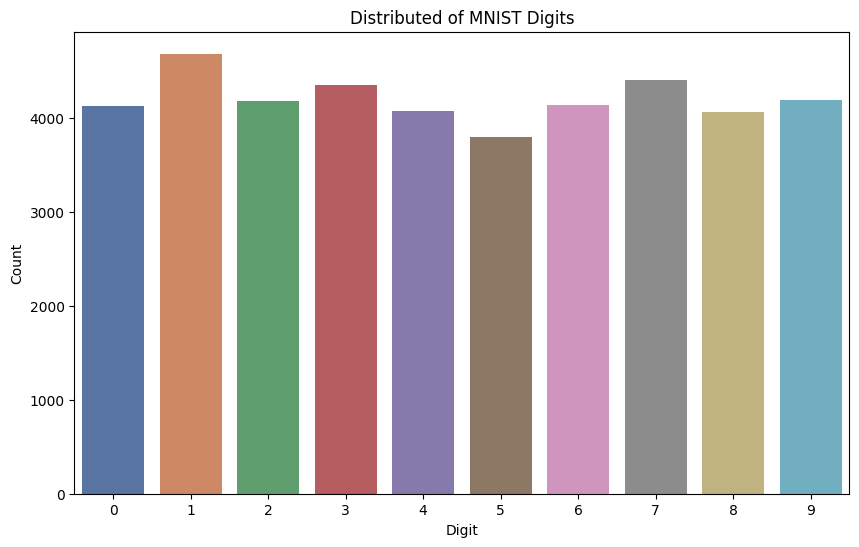

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='label',data=train_data,palette='deep',hue='label',legend=False)
plt.title('Distributed of MNIST Digits')
plt.xlabel("Digit")
plt.ylabel('Count')
plt.show()

(784,)


Text(0.5, 1.0, 'Digit 4')

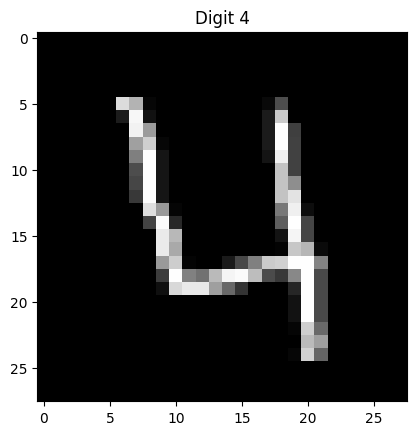

In [14]:
digit =train_data.iloc[3,1:]
print(digit.shape)

digit = digit.values.reshape(28,28)
plt.imshow(digit,cmap='gray')
plt.title("Digit 4")

In [15]:
X = train_data.drop(columns='label')
Y = train_data['label']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [21]:
svm_clf=SVC(kernel='linear',random_state=42)
svm_clf.fit(X_train_scaled,y_train)

y_pred = svm_clf.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       816
           1       0.95      0.99      0.97       909
           2       0.90      0.92      0.91       846
           3       0.89      0.89      0.89       937
           4       0.91      0.94      0.92       839
           5       0.87      0.88      0.88       702
           6       0.95      0.95      0.95       785
           7       0.94      0.92      0.93       893
           8       0.92      0.87      0.89       835
           9       0.92      0.88      0.90       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 2.6min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 2.6min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 2.6min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 2.6min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 2.6min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 2.6min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 2.6min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 2.5min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 2.6min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 9.4min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 9.4min
[CV] END .....................C=0.1, gamma=scale

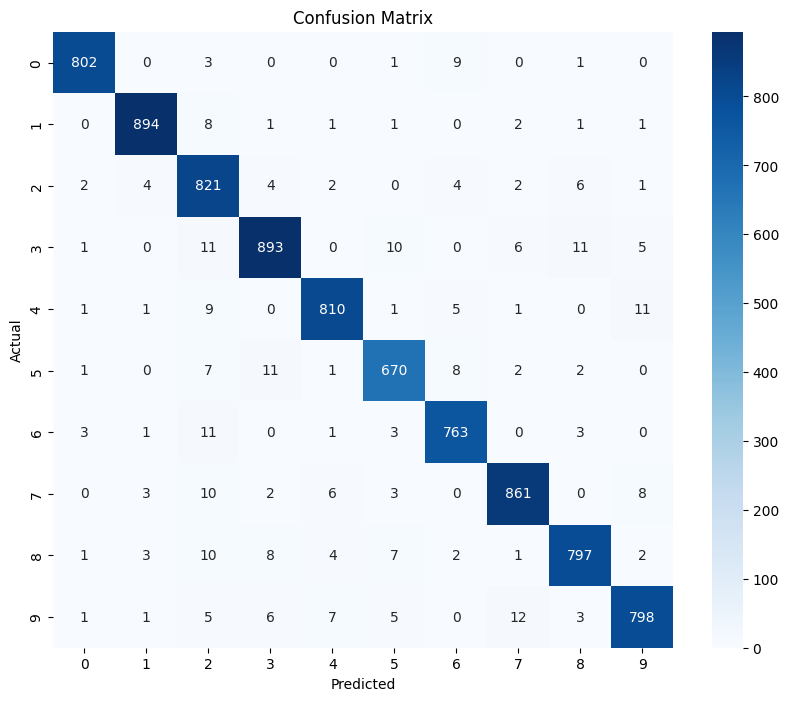

In [23]:

param_grid = {
    'C': [0.1, 1, 10],          
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale', 'auto']   
}


grid_svm = GridSearchCV(SVC(), param_grid, cv=3, verbose=2, n_jobs=-1)


grid_svm.fit(X_train_scaled, y_train)


print("Best Parameters:", grid_svm.best_params_)


y_pred_grid = grid_svm.best_estimator_.predict(X_test_scaled)


print("Classification Report for GridSearch SVM:\n")
print(classification_report(y_test, y_pred_grid))


cm = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
